# Image retrieval


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/'My Drive'/Code/ImagesProcessing

/content/drive/My Drive/Code/ImagesProcessing


In [3]:
ls

BasicProcessing.ipynb                 images/
BTT1_Oanh.ipynb                       images_test/
Canny.ipynb                           IoU.ipynb
Convolution.ipynb                     ReadImages.ipynb
Day7_Object_Detection_solution.ipynb  Segmentation.ipynb
Edge_detection.ipynb                  SS_Course_Day1.ipynb
Histogram.ipynb                       Wang/
ImageRetrieval.ipynb


In [21]:
from IPython.display import Image
import matplotlib.pyplot as plot
from matplotlib.colors import NoNorm
import cv2 as cv
import numpy as np
import sys
import os
import math 
print(cv2.__version__)

3.4.3


Compare images by using color histogram

Distance: Wang/603.jpg and  Wang/603.jpg is: 0.0
Distance: Wang/603.jpg and  Wang/602.jpg is: 14548.6010324
Distance: Wang/603.jpg and  Wang/284.jpg is: 31826.7521749
Distance: Wang/603.jpg and  Wang/400.jpg is: 78205.9275822
Distance: Wang/603.jpg and  Wang/330.jpg is: 20145.6043593
Distance: Wang/603.jpg and  Wang/731.jpg is: 36234.096539
Distance: Wang/603.jpg and  Wang/804.jpg is: 25447.4863002


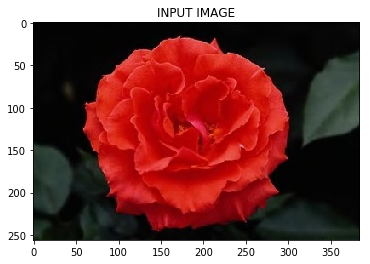

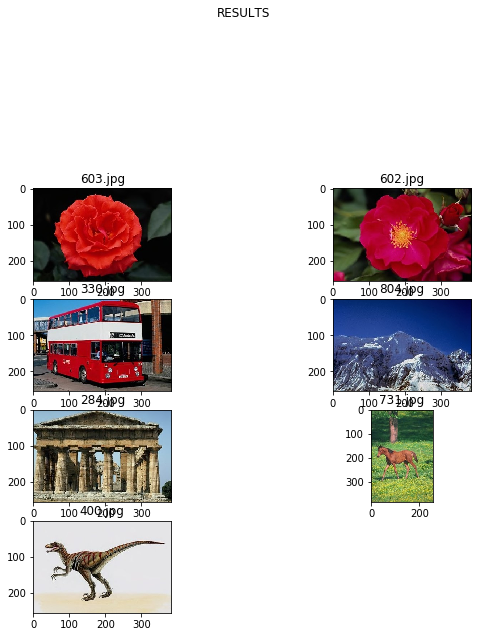

In [39]:
link_input_image = r"Wang/603.jpg"
link_folder_images = r"Wang" 
def cm_to_inch(value):
    return value/2.54
class CalcHistogramsDistance:
    def __init__(self, input_img_ = link_input_image, input_folder_ = link_folder_images):
        self.input_img = cv.imread(input_img_, cv.COLOR_BGR2GRAY) # matrix of gray image
        self.input_folder = input_folder_ # folder link contain images
        self.model_hist = self.calcHistogram(self.input_img) # histogram of input image
    
    def calcHistogram(self, input_image): 
        # Input:  a gray image matrix, 
        # Output: a histogram as int data 
        hist = np.zeros(256, dtype = int)
        for i in range(input_image.shape[0]):
            for j in range(input_image.shape[1]):
                hist[ input_image[i][j] ] += 1        
        return hist

    def calcHistogramsDistance(self, input_hist): 
        # calculate a pair of histograms between model and image input
        # Input: The histogram of a image
        # Output: The match value between model(input) and image 
        min_dis = 0; sigmaM = 0; dis=0;
        for i in range(len(input_hist)):
            #min_dis += min(self.model_hist[i], input_hist[i])
            #sigmaM += self.model_hist[i]
            dis+=pow(self.model_hist[i]-input_hist[i], 2)
        return math.sqrt(dis)
        #return 1 - (min_dis / sigmaM)

    def calcHistoInFolder(self, flot = True):
        # calculate match values in the folder
        # Input: flot = True => displays the images in a folder with ascending order of distance
        dir_folder = {}     # key: name of file in current path folder ; value: the match value between model(input) and image 
        for file in os.listdir(self.input_folder):
            path_file = self.input_folder + '/' + file
            img_file = cv.imread(path_file, cv.COLOR_BGR2GRAY)
            temp_hist = self.calcHistogram(img_file)
            dir_folder[file] = self.calcHistogramsDistance(temp_hist)
            print( "Distance: {} and  {} is: {}".format(link_input_image, path_file, self.calcHistogramsDistance(temp_hist) ))            
        if flot == True:
            sorted_orders = sorted(dir_folder.items(), key= lambda x: x[1])           
            plot.title("INPUT IMAGE")
            self.input_img = cv.cvtColor(self.input_img, cv.COLOR_BGR2RGB)
            plot.imshow(self.input_img)
            plot.figure(figsize=(cm_to_inch(25),cm_to_inch(25)))
            for count,i in enumerate(sorted_orders, 3):                
                plot.subplot((int(len(dir_folder)/2) + 2), 2, count)
                plot.title(i[0])                
                file_img = cv.imread(self.input_folder +"/"+ i[0])                
                file_img = cv.cvtColor(file_img, cv.COLOR_BGR2RGB)
                plot.imshow(file_img)
            plt.suptitle("RESULTS")
            plot.show()

calc_obj = CalcHistogramsDistance()
calc_obj.calcHistoInFolder()